# Lagrangian Double Pendulum - Tiberius Berndsen
In this code I will do parts A, B and C of the first problem

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

# Part A

Here we wish to solve the Euler - Lagrange equations for a double pendulum. Before we start it is good to note what the Euler - Lagrange equations will be. Obviously we will be solving for the two angles $\phi_{1}$ and $\phi_{2}$. So given this they will be of this form.

$\begin{equation}
\mathcal{L} = T - U
\end{equation}$

$\begin{equation}
\frac{d}{dt}\frac{d\mathcal{L}}{d\dot\phi_{i}} - \frac{d\mathcal{L}}{d\phi_{i}} = 0
\end{equation}$

In the problem statement we were directed to the use Taylor's Classical mechanics to note that the equations 11.37 and 11.38 provide with the components of the lagrangian which will be written down.

$\begin{equation}
T = \frac{1}{2}(m_{1}+m_{2})L_{1}^2\dot\phi_{1}^2 + m_{2}L_{1}L_{2}\dot\phi_{1}\dot\phi_{2}\cos(\phi_{1}-\phi_{2}) + \frac{1}{2}m_{2}L_{2}^2\dot\phi_{2}^2
\end{equation}$

$\begin{equation}
U = (m_{1}+m_{2})gL_{1}(1-\cos\phi_{1}) + m_{2}gL_{2}(1-\cos\phi_{2})
\end{equation}$

So here we can use this to generate two equations of motion. To do this we plug in the third and fourth equations into the first, and then the first into the second, as there are two generalized coordinates we have two equations. Listed below are the equations of motion.

$\begin{equation}
(m_{1} + m_{2}) L_{1}\ddot\phi_{1} + m_{2}L_{2}\ddot\phi_{2}\cos(\phi_{1} - \phi_{2}) + m_{2}L_{2}\dot\phi_{2}^2\sin(\phi_{1} - \phi_{2}) + (m_{2} + m_{2})g\sin\phi_{1} = 0
\end{equation}$

$\begin{equation}
m_{2}L_{2}\ddot\phi_{2} + m_{2}L_{1}\ddot\phi_{1}\cos(\phi_{1}-\phi_{2}) - m_{2}L_{1}\dot\phi_{1}^2\sin(\phi_{1}-\phi_{2}) + m_{2}g\sin\phi_{2} = 0
\end{equation}$

Now here is the problem when solving for this we have a 4 component vector like so.

$ \begin{align}
y = 
\begin{pmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
\end{pmatrix}
=
\begin{pmatrix}
\phi_{1}\\
\dot\phi_{1}\\
\phi_{2}\\
\dot\phi_{2}\\
\end{pmatrix}
\end{align}
$

So we need to rewrite those equations of motion in such a manner that the derive of this is still a series of first order differential equations.

$ \begin{align}
\frac{dy}{dt} = 
\begin{pmatrix}
\dot y_1\\
\dot y_2\\
\dot y_3\\
\dot y_4\\
\end{pmatrix}
=
\begin{pmatrix}
\dot\phi_{1}\\
\ddot\phi_{1}\\
\dot\phi_{2}\\
\ddot\phi_{2}\\
\end{pmatrix}
\end{align}
$

So the two equations of motion need to be written in a different manner since they are to be inserted where $\dot y_2$ and $\dot y_4$ are. Doing so will result in the following equations.

$\begin{equation}
\ddot\phi_{1} = \frac{m_{2}g\sin\phi_{2}\cos(\phi_{1}-\phi_{2}) - m_{2}\sin(\phi_{1}-\phi_{2})(L_{1}\dot\phi_{1}^2\cos(\phi_{1}-\phi_{2}) + L_{2}\dot\phi_{2}^2) - (m_{1}+m_{2})g\sin\phi_{1}}{L_{1}(m_{1}+m_{2}\sin^2(\phi_{1}-\phi_{2}))}
\end{equation}$

$\begin{equation}
\ddot\phi_{2} = \frac{(m_{1}+m_{2})(L_{1}\dot\phi_{1}^2\sin(\phi_{1}-\phi_{2}) - g\sin\phi_{2} + g\sin\phi_{1}\cos(\phi_{1}-\phi_{2})) + m_{2}L_{2}\dot\phi_{2}^2\sin(\phi_{1}-\phi_{2})\cos(\phi_{1}-\phi_{2})}{L_{2}(m_{1}+m_{2}\sin^2(\phi_{1}-\phi_{2}))}
\end{equation}$

In [3]:
class FullDoublePendulum():
    """
    Here we will use the full equations as defined just above in order to 
    solve for it. This numerical analysis is needed in the case of the
    double pendulum as no analytical solution exists
    
    """
    def __init__(self, L_1=1., L_2=1., m_1=1., m_2=1., g=1.):
        self.L_1 = L_1 #Length of first pendulum: Float
        self.L_2 = L_2 #Length of second pendulum: Float
        self.m_1 = m_1 #mass of first point: Float
        self.m_2 = m_2 #mass of second point: Float
        self.g = g #constant gravitational acceleration: Float
        
    """
    Two of each for length and mass is needed, that is why it is called
    the double pendulum. This is very important as the differences in the
    ratios between these very heavily affect the motion of the two masses.
    """
    def dy_dt(self, t, y):
        """
        Even though is was stated in the write up before, y[0] = \phi1,
        y[1] = \dot\phi1, y[2] = \phi2, y[3] = \dot\phi2
        as for dy_dt, each component is the time derivative of the 
        corresponding y vector component.
        """
        return [y[1], ( 1 / (self.L_1 * (self.m_1 + self.m_2 * np.sin(y[0] - y[2]) ** 2))) * (self.m_1 * \
                self.g * np.sin(y[2]) * np.cos(y[0]-y[2]) - self.m_2 * np.sin(y[0] - y[2]) * (self.L_1 * \
                y[1] ** 2 * np.cos(y[0] - y[2]) + self.L_2 * y[3] ** 2) - (self.m_1 +self.m_2) * self.g * \
                np.sin(y[0])) , y[3], ( 1 / (self.L_2 * (self.m_1 + self.m_2 * (np.sin(y[0] - y[2])) ** 2))) * \
               ((self.m_1 + self.m_2) * (self.L_1 * y[1] ** 2 * np.sin(y[0] - y[2]) - self.g * np.sin(y[2]) + self.g * \
                np.sin(y[0]) * np.cos(y[0] - y[2])) + self.m_2 * self.L_2 * y[3] ** 2 * np.sin(y[0] - y[2]) * \
               np.cos(y[0]-y[2]))]
    
    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0, abserr=1.0e-9, relerr=1.0e-9):
        """
        Here we must specify four intial conditions: phi_1_0, phi_1_dot_0, phi_2_0, and phi_2_dot_0
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

In [4]:
#This part was borrowed from the Lagrangian Pendulum Notebook

def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
#This part was borrowed from the Lagrangian Pendulum Notebook

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')

t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1. #Length of first pendulum
L2 = 1. #Length of second pendulum
m1 = 1. #Mass of first
m2 = 1. #Mass of second 
g = 1. #Gravitational acceleration

fdp = FullDoublePendulum(L1, L2, m1, m2, g)


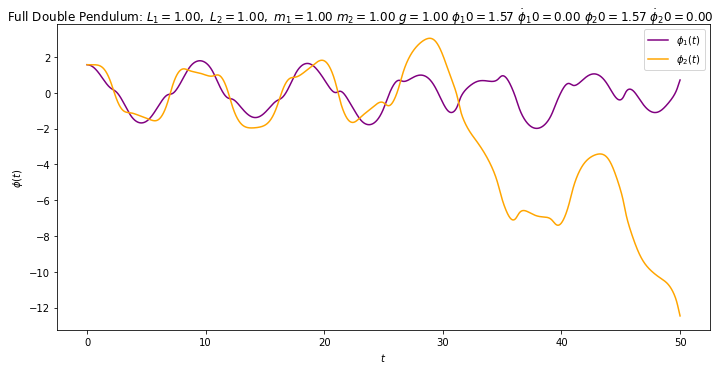

In [7]:
#Here we will generate the initial conditions
phi_1_0 = np. pi / 2
phi_1_dot_0 = 0.0
phi_2_0 = np.pi / 2
phi_2_dot_0 = 0.0

phi_1, phi_1_dot, phi_2, phi_2_dot = fdp.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0)

#Now we define what the figure shall have on it 
fig = plt.figure(figsize=(10,5))
overall_title = 'Full Double Pendulum:' + \
                rf' $ L_{1} = {L1:.2f},$' + \
                rf' $ L_{2} = {L2:.2f},$' + \
                rf' $ m_{1} = {m1:.2f}$' + \
                rf' $ m_{2} = {m2:.2f}$' + \
                rf' $ g = {g:.2f}$' + \
                rf' $ \phi_{10} = {phi_1_0:.2f}$' + \
                rf' $ \dot\phi_{10} = {phi_1_dot_0:.2f}$' + \
                rf' $ \phi_{20} = {phi_2_0:.2f}$' + \
                rf' $ \dot\phi_{20} = {phi_1_dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)

#This is the plotting information for phi_1
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='purple',
            label=r'$\phi_{1}(t)$', 
            ax=ax_a)
 
#This is the plotting information for phi_2
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='orange',
            label=r'$\phi_{2}(t)$', 
            ax=ax_a) 

fig.tight_layout()
fig.savefig('Full_Double_Pendulum.png', bbox_inches='tight') 

# Part B
Now from the figure above we would assume that the motion is chaotic. The thing about chaos is that it is not about how it looks in the short run. One can have a very erratic looking motion that actually repeats itself given time. The easiest way is through the analysis of a state space plot and comparing it to the motion of a simplication of the full double pendulum. Small angle approximations are made when $\sin(x) \approx x$. Doing some rough calculations this is somewhere in the range of x such that. (Note though this is not exact, only a rough range.)

$\begin{equation}
- \frac{\pi}{10} \leq x \leq \frac{\pi}{10}
\end{equation}$

So what we should do is use a state space plot, $\dot\phi ~~ vs ~~ \phi$ and show whether or not it closes on it self. We already have the needed values for the full equations, so let us produce the ones for the small angle one.

In [8]:

# Here assume small angle conditions
phi_1_small_0 = np.pi / 10
phi_1_dot_small_0 = 0.0
phi_2_small_0 =  - 1 * np.pi / 10
phi_2_dot_small_0 = 0.0
phi_1_small, phi_1_dot_small, phi_2_small, phi_2_dot_small = fdp.solve_ode(t_pts, phi_1_small_0, phi_1_dot_small_0, \
                                                phi_2_small_0, phi_2_dot_small_0)

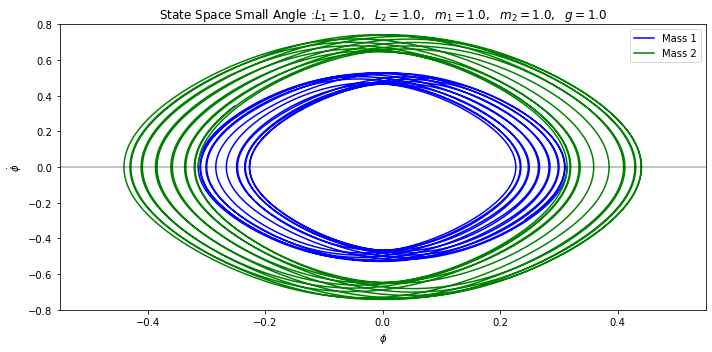

In [9]:
fig_state_space = plt.figure(figsize=(10,5))
ax_state_space = fig_state_space.add_subplot(1,1,1)

# Here we will plot the state space on the same graph, to show that for both the motion is not chaotic.
ax_state_space.plot(phi_1_small, phi_1_dot_small, linestyle='solid', color='blue', label='Mass 1')
ax_state_space.plot(phi_2_small, phi_2_dot_small, linestyle='solid', color='green', label='Mass 2')

# Make sure one picks suitable limits so you can see all of the figure
ax_state_space.set_xlim(-.55, .55)
ax_state_space.set_ylim(-.8, .8)
ax_state_space.set_xlabel('$\phi$')
ax_state_space.set_ylabel('$\dot\phi$')
ax_state_space.set_title(f'State Space Small Angle :$ L_1 = {L1},\ \ L_2 = {L2},\ \ m_1 = {m1} ,\ \  m_2 = {m2}, \ \ g = {g}$')
ax_state_space.legend(loc='upper center')
ax_state_space.axhline(0., color='black', alpha=0.3)
plt.legend(loc = 'upper right')
fig_state_space.tight_layout()

This neat looking graph has the interesting feature that the two different  plots close back in on themselves. Basically each one has a finitely countable number of enclosed loops. This tells us that the period is finite, which tells us that the initial coniditions provided do not cause chaos, there is repeated motion. To Illustrate further suppose I changed them to be even smaller.

In [10]:

# Here assume small angle conditions
phi_1_small_0 = np.pi / 20
phi_1_dot_small_0 = 0.0
phi_2_small_0 =  - 1 * np.pi / 20
phi_2_dot_small_0 = 0.0
phi_1_small, phi_1_dot_small, phi_2_small, phi_2_dot_small = fdp.solve_ode(t_pts, phi_1_small_0, phi_1_dot_small_0, \
                                                phi_2_small_0, phi_2_dot_small_0)

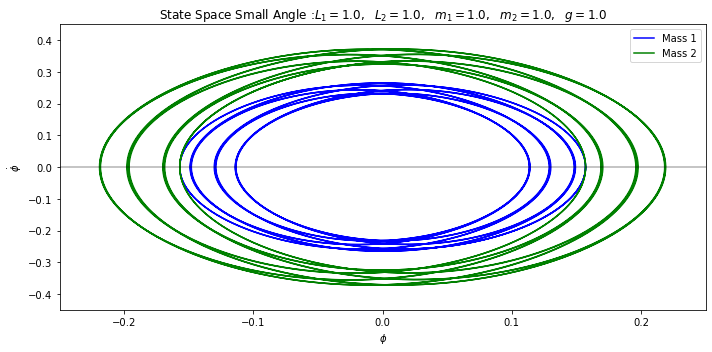

In [11]:
fig_state_space = plt.figure(figsize=(10,5))
ax_state_space = fig_state_space.add_subplot(1,1,1)

# Here we will plot the state space on the same graph, to show that for both the motion is not chaotic.
ax_state_space.plot(phi_1_small, phi_1_dot_small, linestyle='solid', color='blue', label='Mass 1')
ax_state_space.plot(phi_2_small, phi_2_dot_small, linestyle='solid', color='green', label='Mass 2')

# Make sure one picks suitable limits so you can see all of the figure
ax_state_space.set_xlim(-.25, .25)
ax_state_space.set_ylim(-.45, .45)
ax_state_space.set_xlabel('$\phi$')
ax_state_space.set_ylabel('$\dot\phi$')
ax_state_space.set_title(f'State Space Small Angle :$ L_1 = {L1},\ \ L_2 = {L2},\ \ m_1 = {m1} ,\ \  m_2 = {m2}, \ \ g = {g}$')
ax_state_space.legend(loc='upper center')
ax_state_space.axhline(0., color='black', alpha=0.3)
plt.legend(loc = 'upper right')
fig_state_space.tight_layout()

One can see even fewer rings, meaning that the period is even smaller! This means for small angles we have it such that the motion is not chaotic. Now let us show it for the values from Part A. It will be obvious from the graph that they are chaotic.

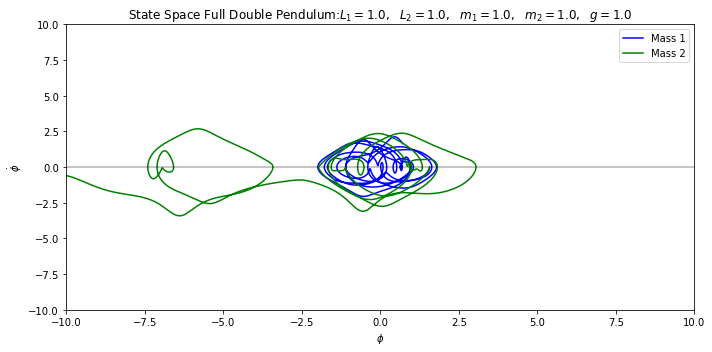

In [12]:
fig_state_space = plt.figure(figsize=(10,5))
ax_state_space = fig_state_space.add_subplot(1,1,1)

# Here we will plot the state space on the same graph, to show that for both the motion is not chaotic.
ax_state_space.plot(phi_1, phi_1_dot, linestyle='solid', color='blue', label='Mass 1')
ax_state_space.plot(phi_2, phi_2_dot, linestyle='solid', color='green', label='Mass 2')

# Make sure one picks suitable limits so you can see all of the figure
ax_state_space.set_xlim(-10., 10.)
ax_state_space.set_ylim(-10., 10.)
ax_state_space.set_xlabel('$\phi$')
ax_state_space.set_ylabel('$\dot\phi$')
ax_state_space.set_title(f'State Space Full Double Pendulum:$ L_1 = {L1},\ \ L_2 = {L2},\ \ m_1 = {m1} ,\ \  m_2 = {m2}, \ \ g = {g}$')
ax_state_space.legend(loc='upper center')
ax_state_space.axhline(0., color='black', alpha=0.3)
plt.legend(loc = 'upper right')
fig_state_space.tight_layout()

Yeesh! You can see for the most part the motion of at least Mass 2 in state space does not close on itself! This means the motion is not periodic, this means that the motion won't necessarily repeat. Since the motion in state space does not close on it self we can conclude with this that conditions that exceed the small angle approximation of $\sin(x) \approx x$ are chaotic. 